In [24]:
library(ggplot2)
library(reshape2)
library(Metrics)
library(lubridate)
options(repr.plot.width=10, repr.plot.height=10)

In [25]:
# Dataset from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand
df = read.csv('SeoulBikeData.csv')

In [26]:
df

Date,Rented.Bike.Count,Hour,Temperature..C.,Humidity...,Wind.speed..m.s.,Visibility..10m.,Dew.point.temperature..C.,Solar.Radiation..MJ.m2.,Rainfall.mm.,Snowfall..cm.,Seasons,Holiday,Functioning.Day
<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0,0,Winter,No Holiday,Yes


In [27]:
names(df)

[1] "Date"                      "Rented.Bike.Count"        
 [3] "Hour"                      "Temperature..C."          
 [5] "Humidity..."               "Wind.speed..m.s."         
 [7] "Visibility..10m."          "Dew.point.temperature..C."
 [9] "Solar.Radiation..MJ.m2."   "Rainfall.mm."             
[11] "Snowfall..cm."             "Seasons"                  
[13] "Holiday"                   "Functioning.Day"

In [28]:
# % missing values
table(is.na(df))


 FALSE 
122640 

In [29]:
# Values in data
dim(df)

[1] 8760   14

In [30]:
# Check unique values for categorical variables (except Date)

unique(df$Seasons)
unique(df$Holiday)
unique(df$Functioning.Day)

[1] "Winter" "Spring" "Summer" "Autumn"

[1] "No Holiday" "Holiday"

[1] "Yes" "No"

In [31]:
# Number of unique dates
length(unique(df$Date))

[1] 365

In [32]:
Dec_Date = decimal_date(dmy(df$Date) + hours(df$Hour))

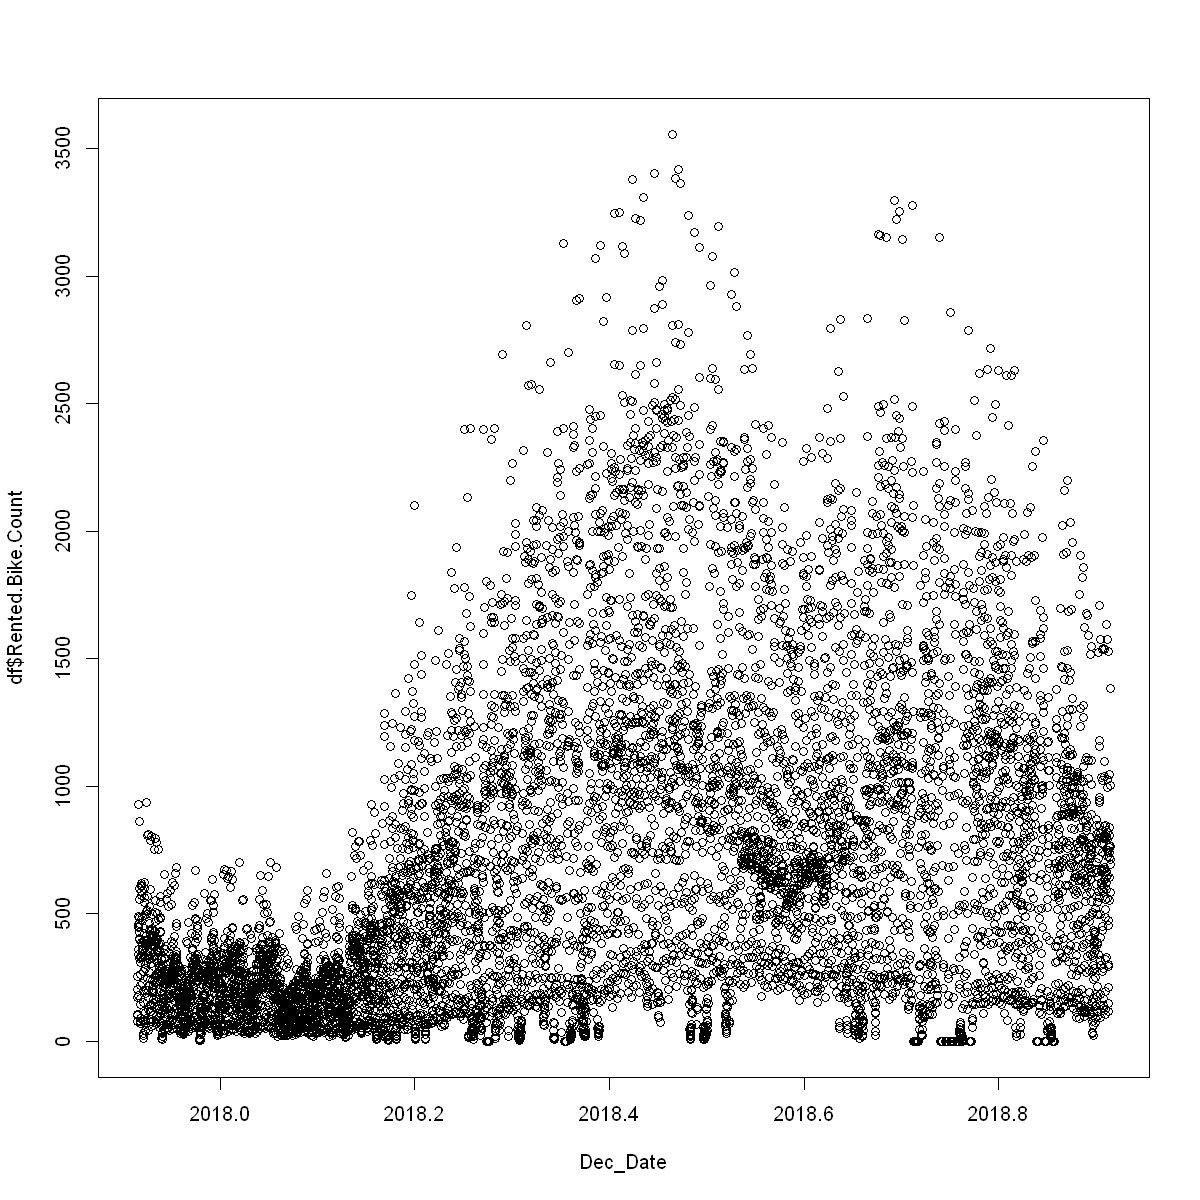

In [33]:
plot(x = Dec_Date, y = df$Rented.Bike.Count)

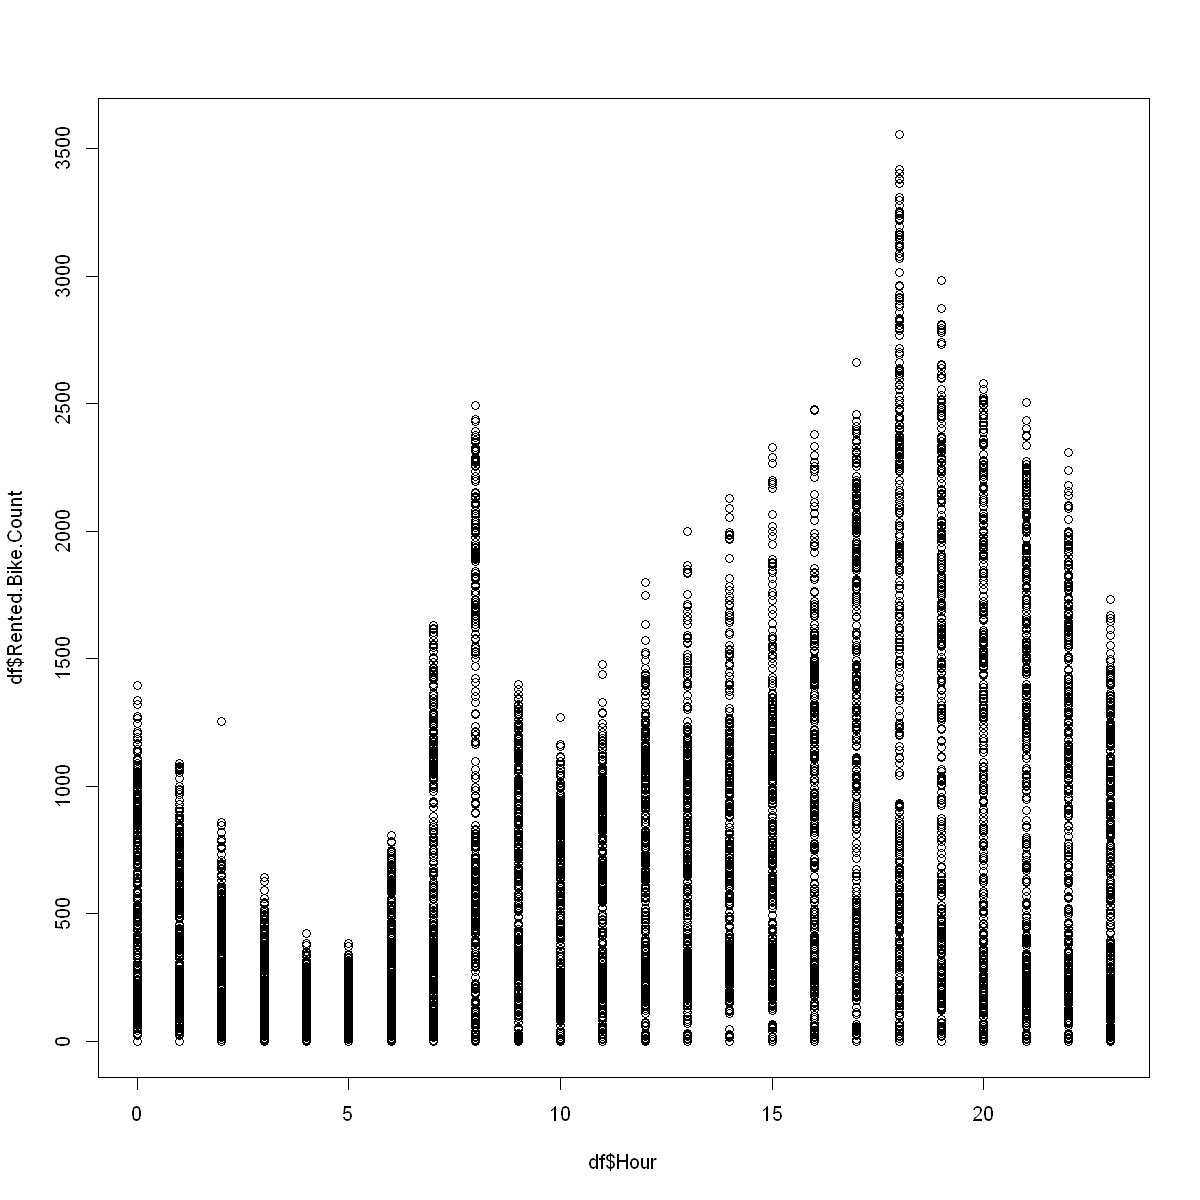

In [34]:
plot(x = df$Hour,y = df$Rented.Bike.Count)

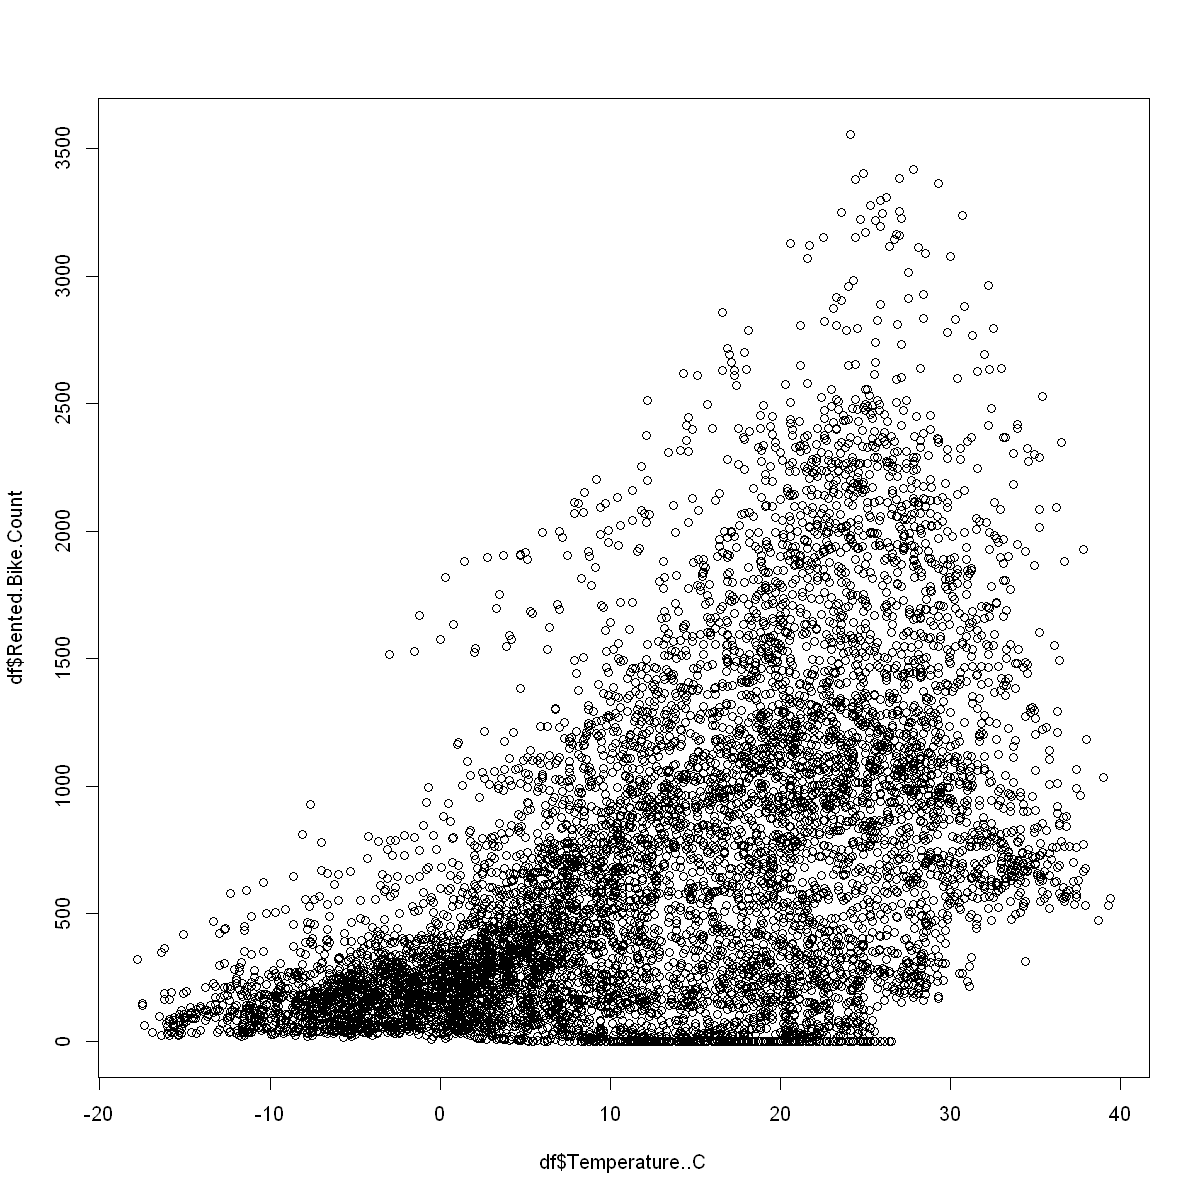

In [35]:
plot(x = df$Temperature..C,y = df$Rented.Bike.Count)

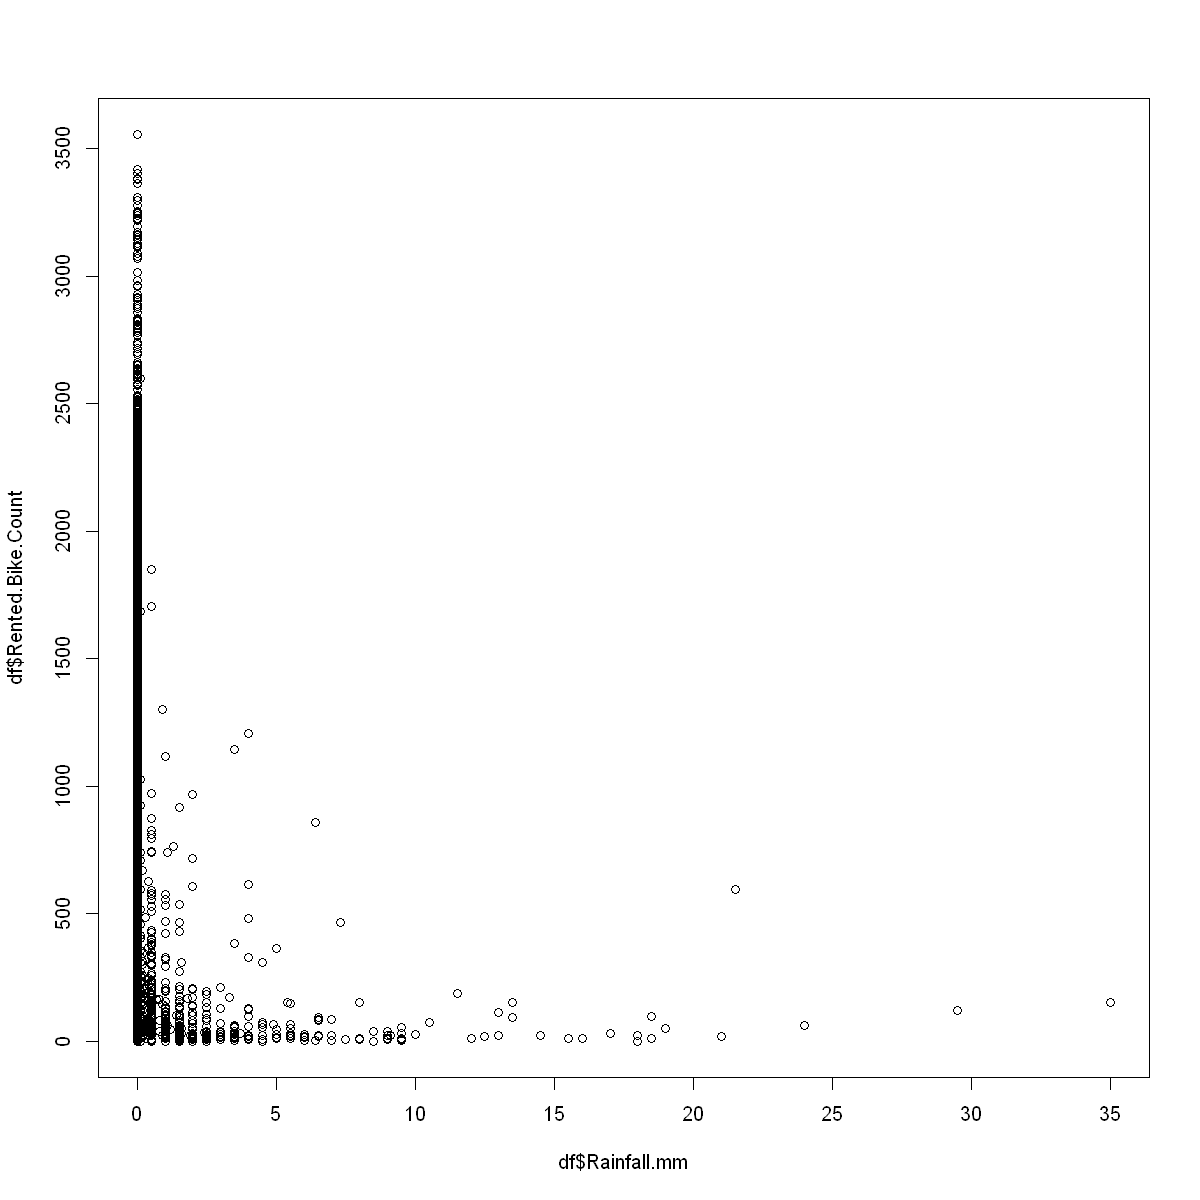

In [36]:
plot(x = df$Rainfall.mm,y = df$Rented.Bike.Count)

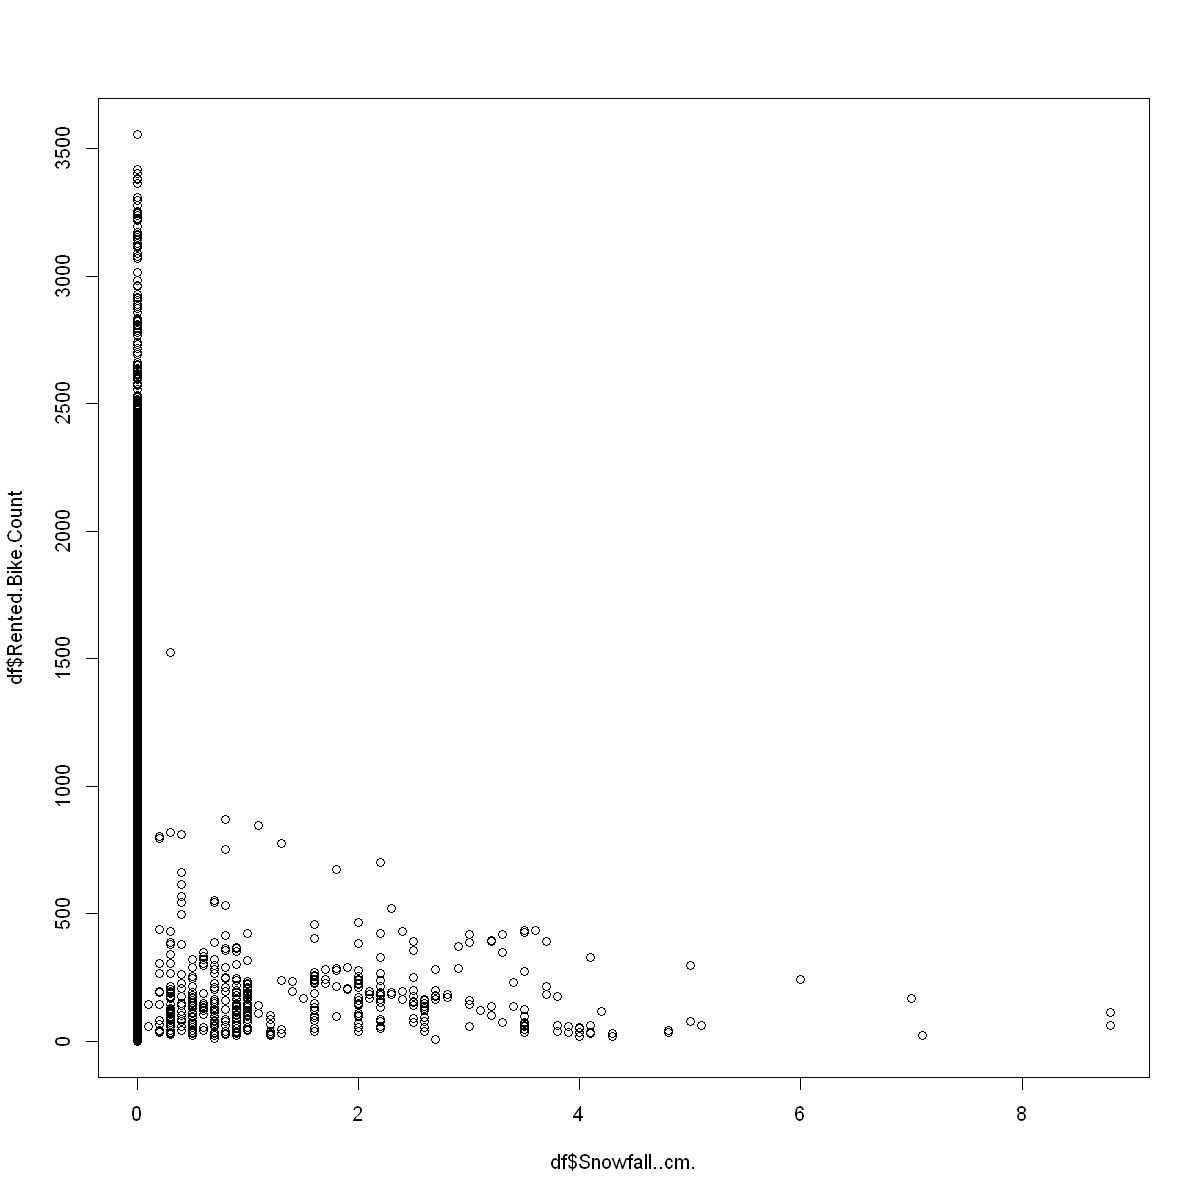

In [37]:
plot(x = df$Snowfall..cm.,y = df$Rented.Bike.Count)

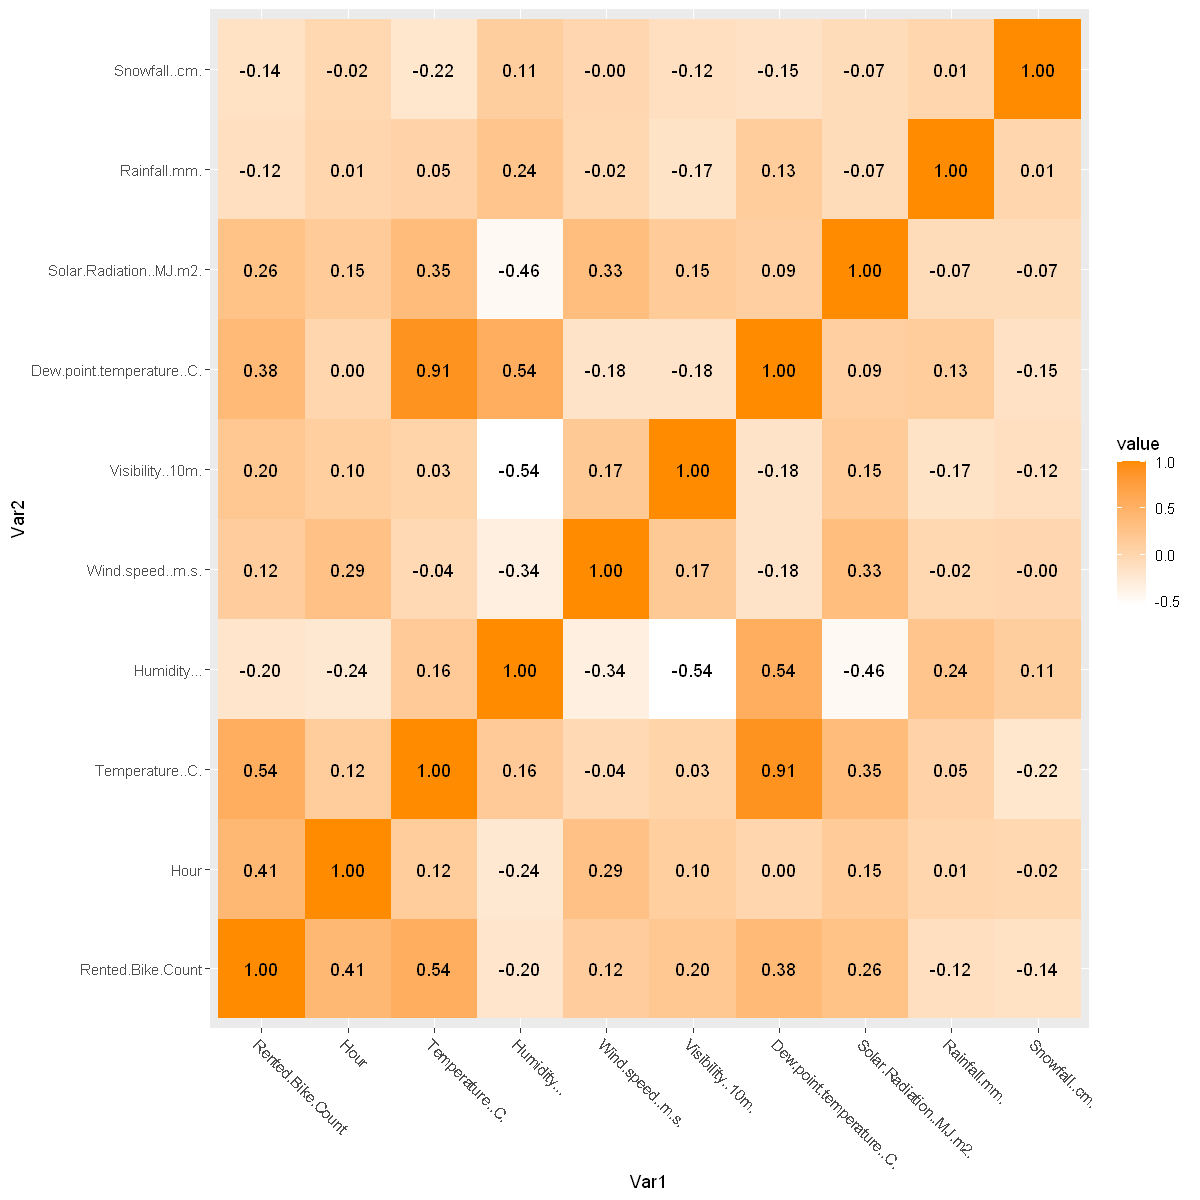

In [38]:
cormat = melt(cor(df[,c(2:11)]))
ggplot(data = cormat, aes(x=Var1, y=Var2, fill=value)) +
geom_tile() +  
guides(x =  guide_axis(angle = -45)) + 
geom_text(aes(label = formatC(value, digits = 2, format = 'f'))) +
scale_fill_gradient(low = "#ffffff",
                    high = "#ff8c00",
                    guide = "colorbar")

#### Initial Data Notes:
- Dates are in DD/MM/YYYY format, maybe consider altering format to be more machine readable
- All other data points are numeric except seasons, holiday and functioning.day
- These are all easily encodable (though unnecessary to do in R)
- No missing values :)
- Hour should be degree 2 or 3 polynomial
- Rainfall and snowfall should degree 2

In [39]:
# Subset data frame for regression
reg_frame = subset(df, select = -c(Date))

In [40]:
# Encode Seasons variable (ordinal)
# Spring - 1, Summer - 2, Autumn - 3, Winter - 4
reg_frame$Seasons = as.numeric(factor(reg_frame$Seasons, levels = c('Spring', 'Summer', 'Autumn', 'Winter'), ordered = TRUE))

In [41]:
# Split data into training and test set
split = sort(sample(nrow(reg_frame), nrow(reg_frame)*.75))
train = reg_frame[split,]
test = reg_frame[-split,]

In [42]:
# Create initial model (no interaction)
mod_1 = lm(Rented.Bike.Count~., data = train)

In [43]:
summary(mod_1)


Call:
lm(formula = Rented.Bike.Count ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1256.25  -288.87   -44.55   211.27  2255.93 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -186.41712  122.04689  -1.527 0.126704    
Hour                        27.38251    0.85516  32.021  < 2e-16 ***
Temperature..C.             21.20760    4.42835   4.789 1.71e-06 ***
Humidity...                -10.05578    1.25717  -7.999 1.48e-15 ***
Wind.speed..m.s.             7.05138    5.98772   1.178 0.238983    
Visibility..10m.             0.04227    0.01137   3.717 0.000203 ***
Dew.point.temperature..C.   10.11081    4.65253   2.173 0.029802 *  
Solar.Radiation..MJ.m2.    -81.67078    8.93962  -9.136  < 2e-16 ***
Rainfall.mm.               -63.28502    5.34693 -11.836  < 2e-16 ***
Snowfall..cm.               21.19244   13.14070   1.613 0.106851    
Seasons                    -30.39828    6.04088  -5.032 4.98e-07 

In [44]:
# RMSE is high considering that the test set has a quarter of the samples that the training set does
p = predict(mod_1, test)
rmse(test$Rented.Bike.Count, p)

[1] 453.73

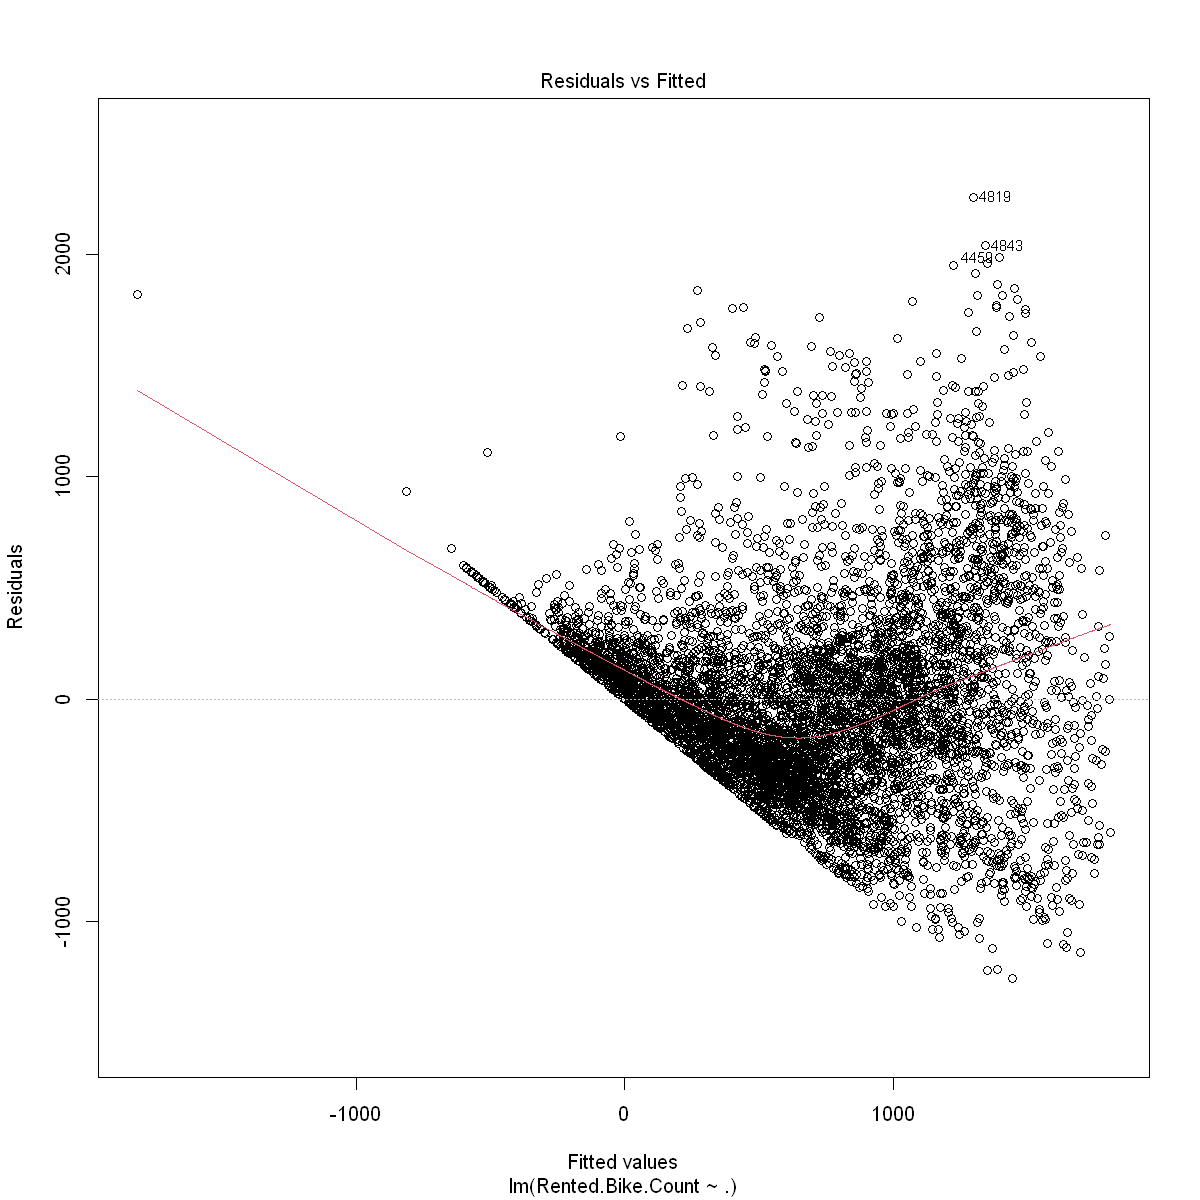

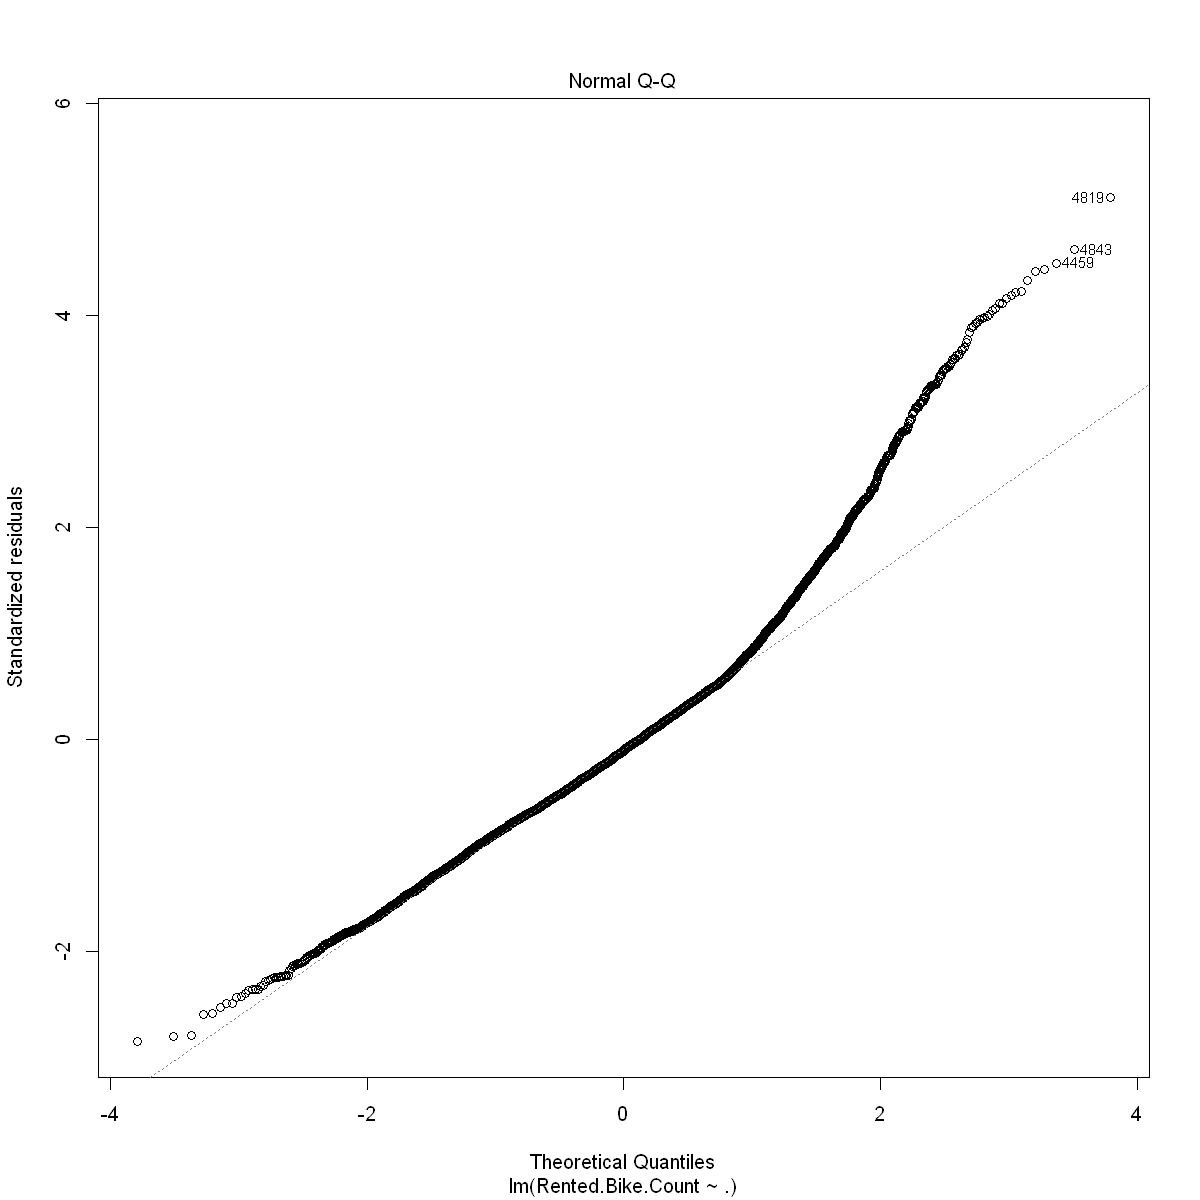

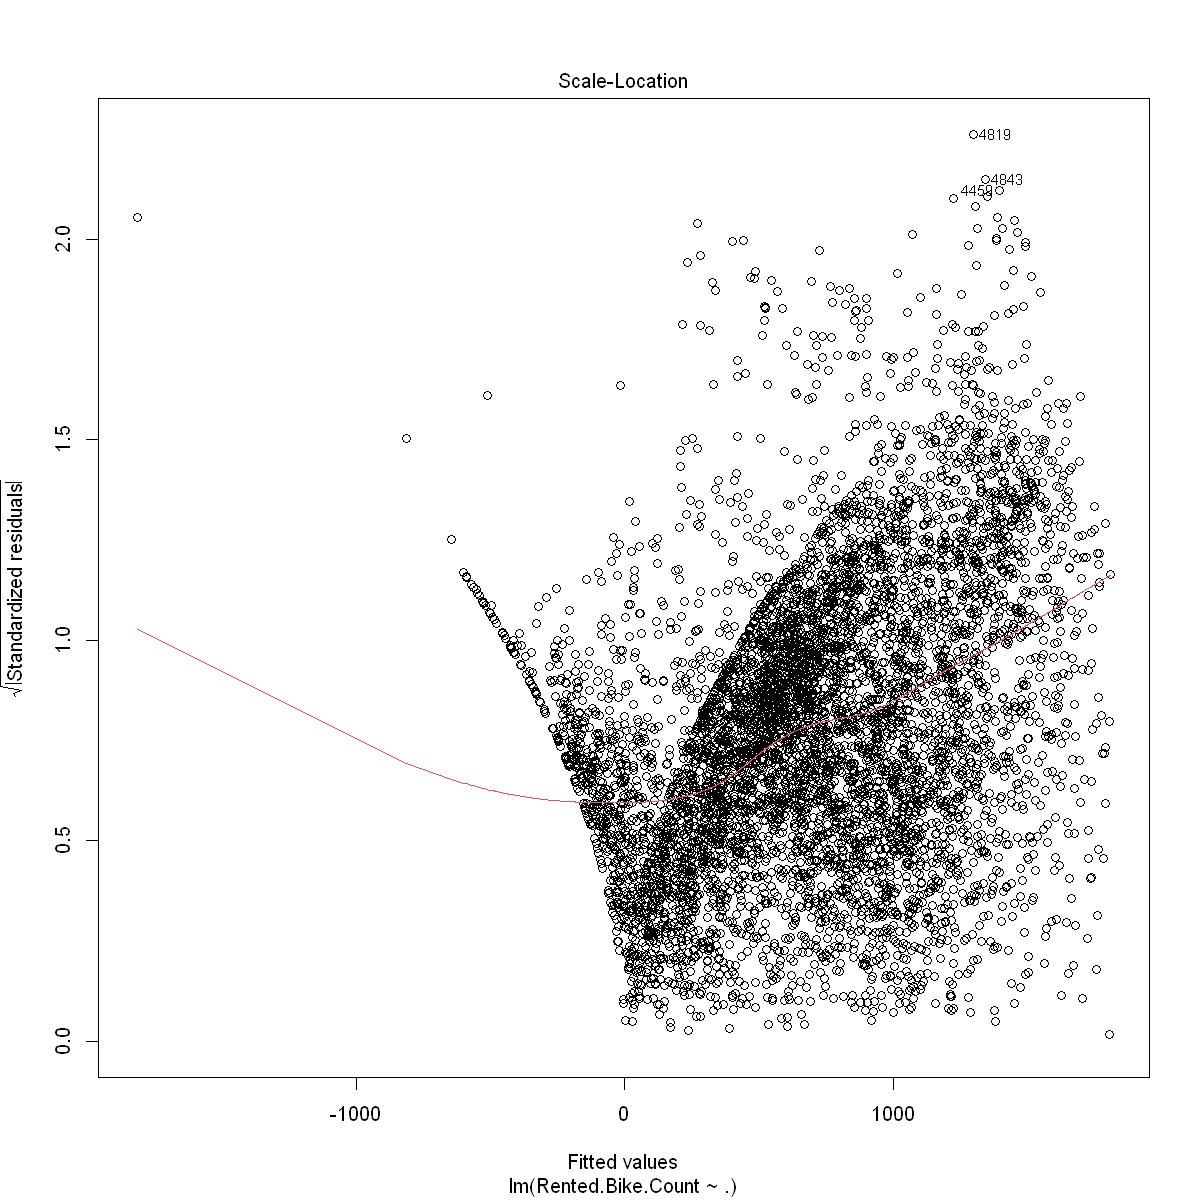

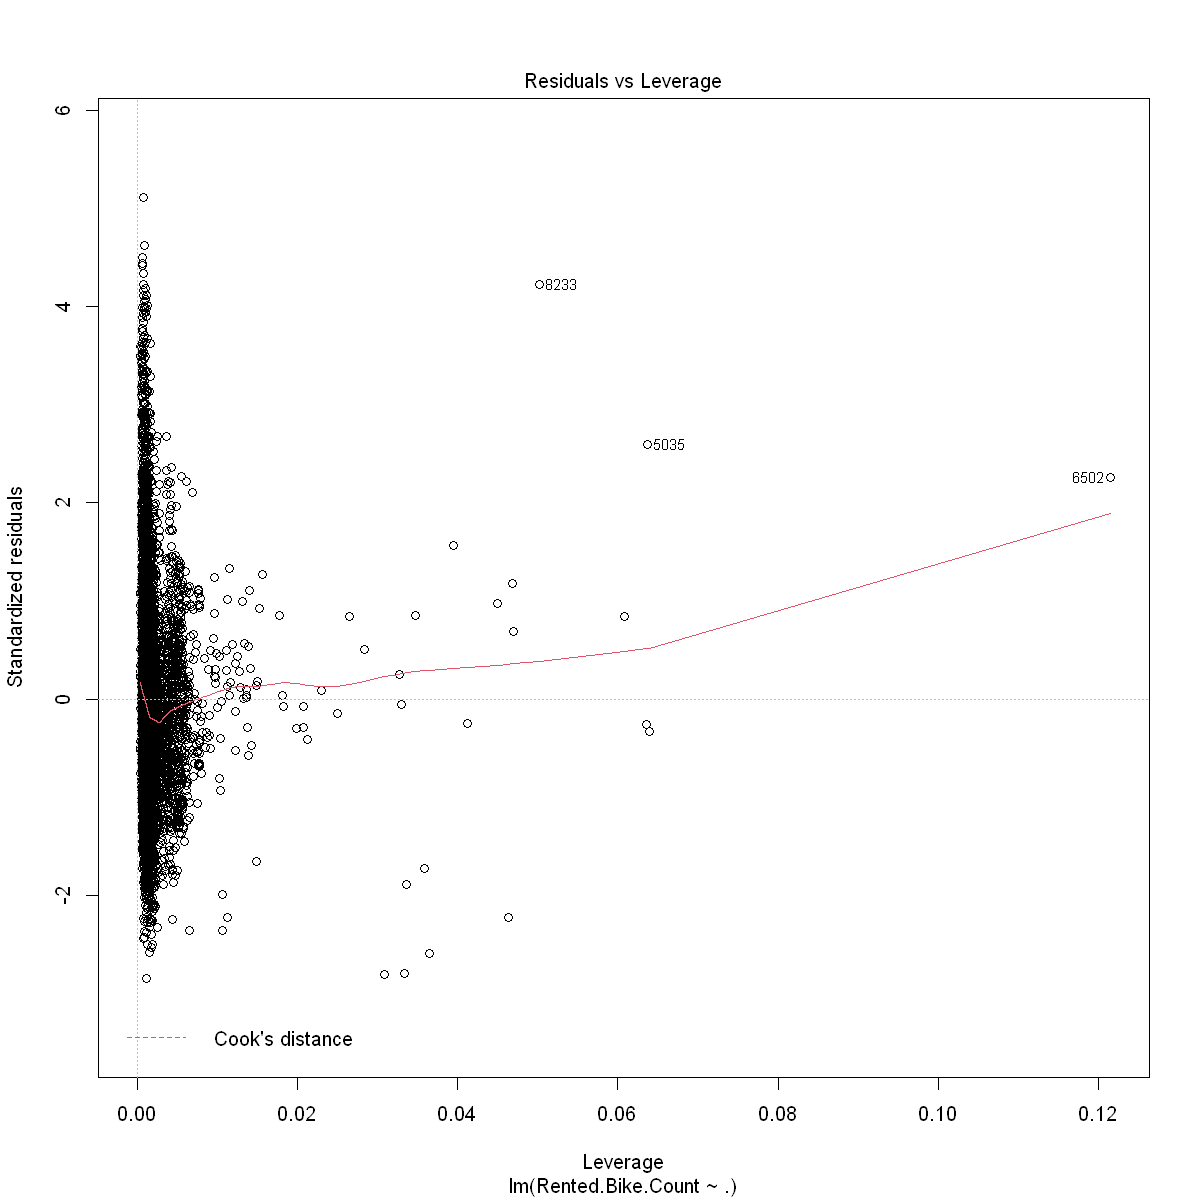

In [45]:
plot(mod_1)

Notes:
- Variance is not constant at all
- There must be some nonlinear features

In [46]:
mod_2 = lm(Rented.Bike.Count~.^2, data = train)

In [47]:
summary(mod_2)


Call:
lm(formula = Rented.Bike.Count ~ .^2, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1322.07  -221.57   -42.37   161.33  1899.81 

Coefficients: (1 not defined because of singularities)
                                                    Estimate Std. Error t value
(Intercept)                                       -1.324e+03  1.151e+03  -1.150
Hour                                               5.054e+01  2.470e+01   2.046
Temperature..C.                                    4.099e+01  4.621e+01   0.887
Humidity...                                        2.150e+01  1.269e+01   1.694
Wind.speed..m.s.                                   1.831e+02  1.267e+02   1.445
Visibility..10m.                                  -6.504e-01  2.641e-01  -2.463
Dew.point.temperature..C.                         -9.832e+00  4.675e+01  -0.210
Solar.Radiation..MJ.m2.                           -7.580e+02  1.878e+02  -4.036
Rainfall.mm.                                       5.529e+03 

In [53]:
step(mod_2)

Start:  AIC=77865.72
Rented.Bike.Count ~ (Hour + Temperature..C. + Humidity... + Wind.speed..m.s. + 
    Visibility..10m. + Dew.point.temperature..C. + Solar.Radiation..MJ.m2. + 
    Rainfall.mm. + Snowfall..cm. + Seasons + Holiday + Functioning.Day)^2


Step:  AIC=77865.72
Rented.Bike.Count ~ Hour + Temperature..C. + Humidity... + Wind.speed..m.s. + 
    Visibility..10m. + Dew.point.temperature..C. + Solar.Radiation..MJ.m2. + 
    Rainfall.mm. + Snowfall..cm. + Seasons + Holiday + Functioning.Day + 
    Hour:Temperature..C. + Hour:Humidity... + Hour:Wind.speed..m.s. + 
    Hour:Visibility..10m. + Hour:Dew.point.temperature..C. + 
    Hour:Solar.Radiation..MJ.m2. + Hour:Rainfall.mm. + Hour:Snowfall..cm. + 
    Hour:Seasons + Hour:Holiday + Hour:Functioning.Day + Temperature..C.:Humidity... + 
    Temperature..C.:Wind.speed..m.s. + Temperature..C.:Visibility..10m. + 
    Temperature..C.:Dew.point.temperature..C. + Temperature..C.:Solar.Radiation..MJ.m2. + 
    Temperature..C.:Rainfall.m


Call:
lm(formula = Rented.Bike.Count ~ Hour + Temperature..C. + Humidity... + 
    Wind.speed..m.s. + Visibility..10m. + Dew.point.temperature..C. + 
    Solar.Radiation..MJ.m2. + Rainfall.mm. + Snowfall..cm. + 
    Seasons + Holiday + Functioning.Day + Hour:Humidity... + 
    Hour:Visibility..10m. + Hour:Dew.point.temperature..C. + 
    Hour:Solar.Radiation..MJ.m2. + Hour:Rainfall.mm. + Hour:Snowfall..cm. + 
    Hour:Holiday + Hour:Functioning.Day + Temperature..C.:Humidity... + 
    Temperature..C.:Wind.speed..m.s. + Temperature..C.:Dew.point.temperature..C. + 
    Temperature..C.:Solar.Radiation..MJ.m2. + Temperature..C.:Rainfall.mm. + 
    Temperature..C.:Snowfall..cm. + Temperature..C.:Seasons + 
    Humidity...:Wind.speed..m.s. + Humidity...:Visibility..10m. + 
    Humidity...:Dew.point.temperature..C. + Humidity...:Solar.Radiation..MJ.m2. + 
    Humidity...:Rainfall.mm. + Humidity...:Functioning.Day + 
    Wind.speed..m.s.:Visibility..10m. + Wind.speed..m.s.:Solar.Radiation..MJ

In [54]:
mod_3 = lm(formula = Rented.Bike.Count ~ Hour + Temperature..C. + Humidity... + 
    Wind.speed..m.s. + Visibility..10m. + Dew.point.temperature..C. + 
    Solar.Radiation..MJ.m2. + Rainfall.mm. + Snowfall..cm. + 
    Seasons + Holiday + Functioning.Day + Hour:Humidity... + 
    Hour:Visibility..10m. + Hour:Dew.point.temperature..C. + 
    Hour:Solar.Radiation..MJ.m2. + Hour:Rainfall.mm. + Hour:Snowfall..cm. + 
    Hour:Holiday + Hour:Functioning.Day + Temperature..C.:Humidity... + 
    Temperature..C.:Wind.speed..m.s. + Temperature..C.:Dew.point.temperature..C. + 
    Temperature..C.:Solar.Radiation..MJ.m2. + Temperature..C.:Rainfall.mm. + 
    Temperature..C.:Snowfall..cm. + Temperature..C.:Seasons + 
    Humidity...:Wind.speed..m.s. + Humidity...:Visibility..10m. + 
    Humidity...:Dew.point.temperature..C. + Humidity...:Solar.Radiation..MJ.m2. + 
    Humidity...:Rainfall.mm. + Humidity...:Functioning.Day + 
    Wind.speed..m.s.:Visibility..10m. + Wind.speed..m.s.:Solar.Radiation..MJ.m2. + 
    Wind.speed..m.s.:Rainfall.mm. + Visibility..10m.:Dew.point.temperature..C. + 
    Visibility..10m.:Solar.Radiation..MJ.m2. + Visibility..10m.:Snowfall..cm. + 
    Visibility..10m.:Seasons + Visibility..10m.:Holiday + Dew.point.temperature..C.:Solar.Radiation..MJ.m2. + 
    Dew.point.temperature..C.:Rainfall.mm. + Dew.point.temperature..C.:Seasons + 
    Dew.point.temperature..C.:Functioning.Day + Solar.Radiation..MJ.m2.:Seasons + 
    Solar.Radiation..MJ.m2.:Holiday + Solar.Radiation..MJ.m2.:Functioning.Day + 
    Rainfall.mm.:Snowfall..cm. + Snowfall..cm.:Seasons + Seasons:Holiday + 
    Holiday:Functioning.Day, data = train)

In [55]:
p_3 = predict(mod_3, test)
rmse(test$Rented.Bike.Count, p_3)

[1] 387.4508

In [58]:
mod_4 = lm(formula = Rented.Bike.Count ~ Hour + Temperature..C. + Humidity... + 
    Wind.speed..m.s. + Visibility..10m. + Dew.point.temperature..C. + 
    Solar.Radiation..MJ.m2. + Rainfall.mm. + Snowfall..cm. + 
    Seasons + Holiday + Functioning.Day + Hour:Humidity... + 
    Hour:Visibility..10m. + Hour:Dew.point.temperature..C. + 
    Hour:Solar.Radiation..MJ.m2. + Hour:Rainfall.mm. + Hour:Snowfall..cm. + 
    Hour:Holiday + Hour:Functioning.Day + Temperature..C.:Humidity... + 
    Temperature..C.:Wind.speed..m.s. + Temperature..C.:Dew.point.temperature..C. + 
    Temperature..C.:Solar.Radiation..MJ.m2. + Temperature..C.:Rainfall.mm. + 
    Temperature..C.:Snowfall..cm. + Temperature..C.:Seasons + 
    Humidity...:Wind.speed..m.s. + Humidity...:Visibility..10m. + 
    Humidity...:Dew.point.temperature..C. + Humidity...:Solar.Radiation..MJ.m2. + 
    Humidity...:Rainfall.mm. + Humidity...:Functioning.Day + 
    Wind.speed..m.s.:Visibility..10m. + Wind.speed..m.s.:Solar.Radiation..MJ.m2. + 
    Wind.speed..m.s.:Rainfall.mm. + Visibility..10m.:Dew.point.temperature..C. + 
    Visibility..10m.:Solar.Radiation..MJ.m2. + Visibility..10m.:Snowfall..cm. + 
    Visibility..10m.:Seasons + Visibility..10m.:Holiday + Dew.point.temperature..C.:Solar.Radiation..MJ.m2. + 
    Dew.point.temperature..C.:Rainfall.mm. + Dew.point.temperature..C.:Seasons + 
    Dew.point.temperature..C.:Functioning.Day + Solar.Radiation..MJ.m2.:Seasons + 
    Solar.Radiation..MJ.m2.:Holiday + Solar.Radiation..MJ.m2.:Functioning.Day + 
    Rainfall.mm.:Snowfall..cm. + Snowfall..cm.:Seasons + Seasons:Holiday + 
    Holiday:Functioning.Day + poly(Hour, 3) + poly(Snowfall..cm., 2) + poly(Rainfall.mm., 2), data = train)

In [59]:
summary(mod_4)


Call:
lm(formula = Rented.Bike.Count ~ Hour + Temperature..C. + Humidity... + 
    Wind.speed..m.s. + Visibility..10m. + Dew.point.temperature..C. + 
    Solar.Radiation..MJ.m2. + Rainfall.mm. + Snowfall..cm. + 
    Seasons + Holiday + Functioning.Day + Hour:Humidity... + 
    Hour:Visibility..10m. + Hour:Dew.point.temperature..C. + 
    Hour:Solar.Radiation..MJ.m2. + Hour:Rainfall.mm. + Hour:Snowfall..cm. + 
    Hour:Holiday + Hour:Functioning.Day + Temperature..C.:Humidity... + 
    Temperature..C.:Wind.speed..m.s. + Temperature..C.:Dew.point.temperature..C. + 
    Temperature..C.:Solar.Radiation..MJ.m2. + Temperature..C.:Rainfall.mm. + 
    Temperature..C.:Snowfall..cm. + Temperature..C.:Seasons + 
    Humidity...:Wind.speed..m.s. + Humidity...:Visibility..10m. + 
    Humidity...:Dew.point.temperature..C. + Humidity...:Solar.Radiation..MJ.m2. + 
    Humidity...:Rainfall.mm. + Humidity...:Functioning.Day + 
    Wind.speed..m.s.:Visibility..10m. + Wind.speed..m.s.:Solar.Radiation..MJ

In [62]:
step(mod_4)

Start:  AIC=77539.79
Rented.Bike.Count ~ Hour + Temperature..C. + Humidity... + Wind.speed..m.s. + 
    Visibility..10m. + Dew.point.temperature..C. + Solar.Radiation..MJ.m2. + 
    Rainfall.mm. + Snowfall..cm. + Seasons + Holiday + Functioning.Day + 
    Hour:Humidity... + Hour:Visibility..10m. + Hour:Dew.point.temperature..C. + 
    Hour:Solar.Radiation..MJ.m2. + Hour:Rainfall.mm. + Hour:Snowfall..cm. + 
    Hour:Holiday + Hour:Functioning.Day + Temperature..C.:Humidity... + 
    Temperature..C.:Wind.speed..m.s. + Temperature..C.:Dew.point.temperature..C. + 
    Temperature..C.:Solar.Radiation..MJ.m2. + Temperature..C.:Rainfall.mm. + 
    Temperature..C.:Snowfall..cm. + Temperature..C.:Seasons + 
    Humidity...:Wind.speed..m.s. + Humidity...:Visibility..10m. + 
    Humidity...:Dew.point.temperature..C. + Humidity...:Solar.Radiation..MJ.m2. + 
    Humidity...:Rainfall.mm. + Humidity...:Functioning.Day + 
    Wind.speed..m.s.:Visibility..10m. + Wind.speed..m.s.:Solar.Radiation..MJ.m2.


Call:
lm(formula = Rented.Bike.Count ~ Hour + Temperature..C. + Humidity... + 
    Wind.speed..m.s. + Visibility..10m. + Dew.point.temperature..C. + 
    Solar.Radiation..MJ.m2. + Rainfall.mm. + Snowfall..cm. + 
    Seasons + Holiday + Functioning.Day + poly(Hour, 3) + poly(Snowfall..cm., 
    2) + poly(Rainfall.mm., 2) + Hour:Humidity... + Hour:Visibility..10m. + 
    Hour:Dew.point.temperature..C. + Hour:Solar.Radiation..MJ.m2. + 
    Hour:Rainfall.mm. + Hour:Snowfall..cm. + Hour:Holiday + Hour:Functioning.Day + 
    Temperature..C.:Humidity... + Temperature..C.:Wind.speed..m.s. + 
    Temperature..C.:Dew.point.temperature..C. + Temperature..C.:Solar.Radiation..MJ.m2. + 
    Temperature..C.:Rainfall.mm. + Temperature..C.:Snowfall..cm. + 
    Temperature..C.:Seasons + Humidity...:Wind.speed..m.s. + 
    Humidity...:Dew.point.temperature..C. + Humidity...:Solar.Radiation..MJ.m2. + 
    Humidity...:Rainfall.mm. + Humidity...:Functioning.Day + 
    Wind.speed..m.s.:Visibility..10m. + Wi

In [63]:
mod_5 = lm(formula = Rented.Bike.Count ~ Hour + Temperature..C. + Humidity... + 
    Wind.speed..m.s. + Visibility..10m. + Dew.point.temperature..C. + 
    Solar.Radiation..MJ.m2. + Rainfall.mm. + Snowfall..cm. + 
    Seasons + Holiday + Functioning.Day + poly(Hour, 3) + poly(Snowfall..cm., 
    2) + poly(Rainfall.mm., 2) + Hour:Humidity... + Hour:Visibility..10m. + 
    Hour:Dew.point.temperature..C. + Hour:Solar.Radiation..MJ.m2. + 
    Hour:Rainfall.mm. + Hour:Snowfall..cm. + Hour:Holiday + Hour:Functioning.Day + 
    Temperature..C.:Humidity... + Temperature..C.:Wind.speed..m.s. + 
    Temperature..C.:Dew.point.temperature..C. + Temperature..C.:Solar.Radiation..MJ.m2. + 
    Temperature..C.:Rainfall.mm. + Temperature..C.:Snowfall..cm. + 
    Temperature..C.:Seasons + Humidity...:Wind.speed..m.s. + 
    Humidity...:Dew.point.temperature..C. + Humidity...:Solar.Radiation..MJ.m2. + 
    Humidity...:Rainfall.mm. + Humidity...:Functioning.Day + 
    Wind.speed..m.s.:Visibility..10m. + Wind.speed..m.s.:Solar.Radiation..MJ.m2. + 
    Visibility..10m.:Dew.point.temperature..C. + Visibility..10m.:Solar.Radiation..MJ.m2. + 
    Visibility..10m.:Snowfall..cm. + Visibility..10m.:Seasons + 
    Visibility..10m.:Holiday + Dew.point.temperature..C.:Solar.Radiation..MJ.m2. + 
    Dew.point.temperature..C.:Rainfall.mm. + Dew.point.temperature..C.:Seasons + 
    Dew.point.temperature..C.:Functioning.Day + Solar.Radiation..MJ.m2.:Seasons + 
    Solar.Radiation..MJ.m2.:Holiday + Solar.Radiation..MJ.m2.:Functioning.Day + 
    Rainfall.mm.:Snowfall..cm. + Snowfall..cm.:Seasons + Seasons:Holiday + 
    Holiday:Functioning.Day, data = train)

In [64]:
summary(mod_5)


Call:
lm(formula = Rented.Bike.Count ~ Hour + Temperature..C. + Humidity... + 
    Wind.speed..m.s. + Visibility..10m. + Dew.point.temperature..C. + 
    Solar.Radiation..MJ.m2. + Rainfall.mm. + Snowfall..cm. + 
    Seasons + Holiday + Functioning.Day + poly(Hour, 3) + poly(Snowfall..cm., 
    2) + poly(Rainfall.mm., 2) + Hour:Humidity... + Hour:Visibility..10m. + 
    Hour:Dew.point.temperature..C. + Hour:Solar.Radiation..MJ.m2. + 
    Hour:Rainfall.mm. + Hour:Snowfall..cm. + Hour:Holiday + Hour:Functioning.Day + 
    Temperature..C.:Humidity... + Temperature..C.:Wind.speed..m.s. + 
    Temperature..C.:Dew.point.temperature..C. + Temperature..C.:Solar.Radiation..MJ.m2. + 
    Temperature..C.:Rainfall.mm. + Temperature..C.:Snowfall..cm. + 
    Temperature..C.:Seasons + Humidity...:Wind.speed..m.s. + 
    Humidity...:Dew.point.temperature..C. + Humidity...:Solar.Radiation..MJ.m2. + 
    Humidity...:Rainfall.mm. + Humidity...:Functioning.Day + 
    Wind.speed..m.s.:Visibility..10m. + Wi

In [65]:
p_5 = predict(mod_5, test)
rmse(test$Rented.Bike.Count, p_5)

Warning message in predict.lm(mod_5, test):
"prediction from a rank-deficient fit may be misleading"


[1] 383.5139

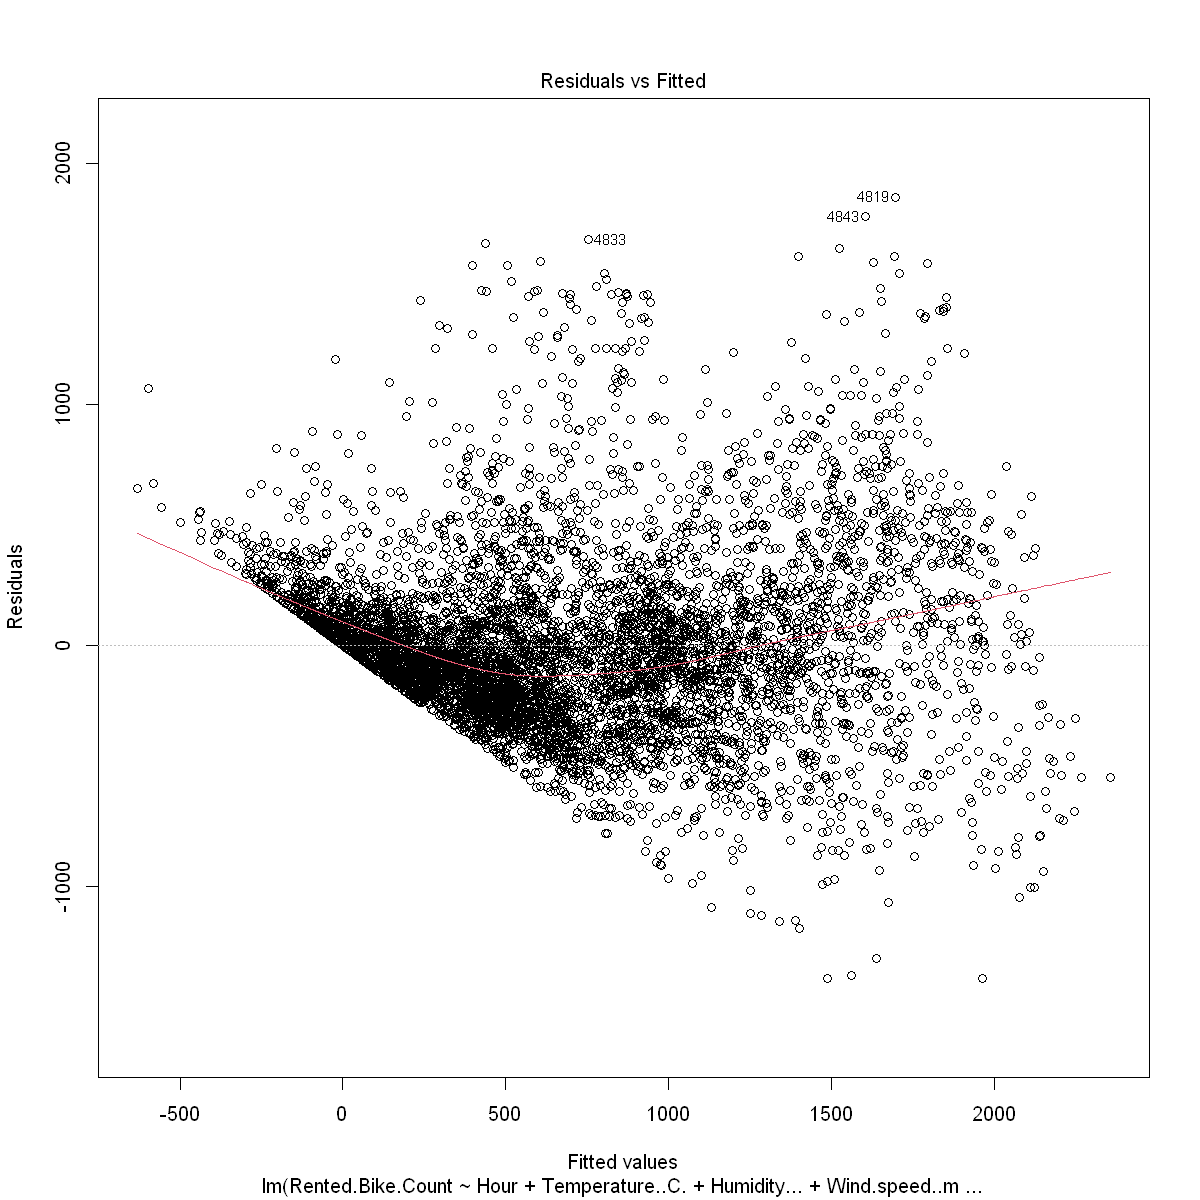

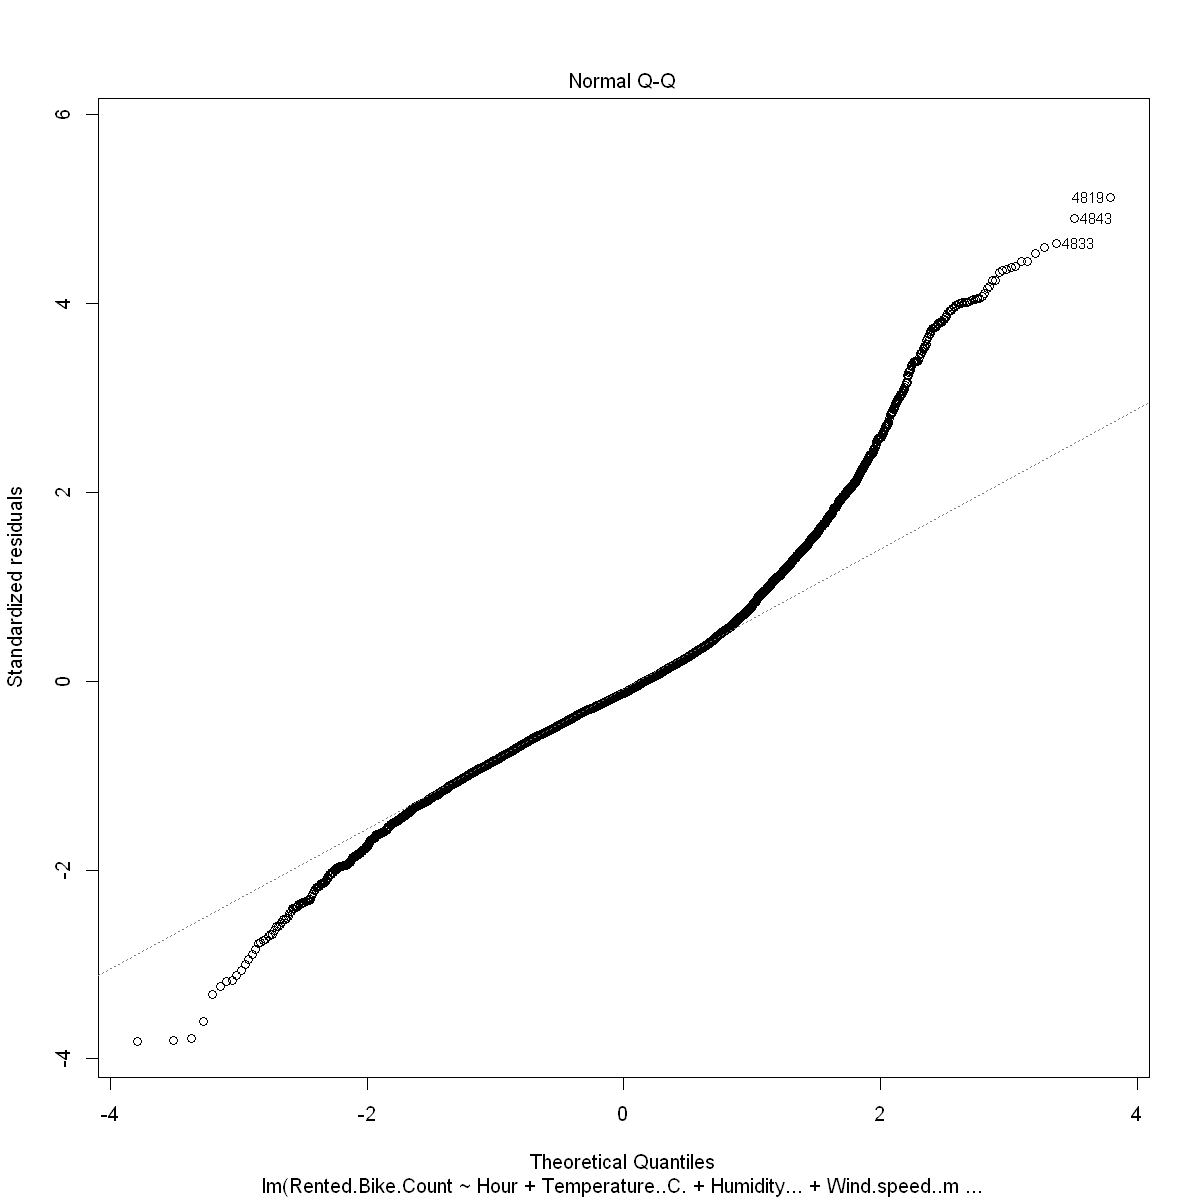

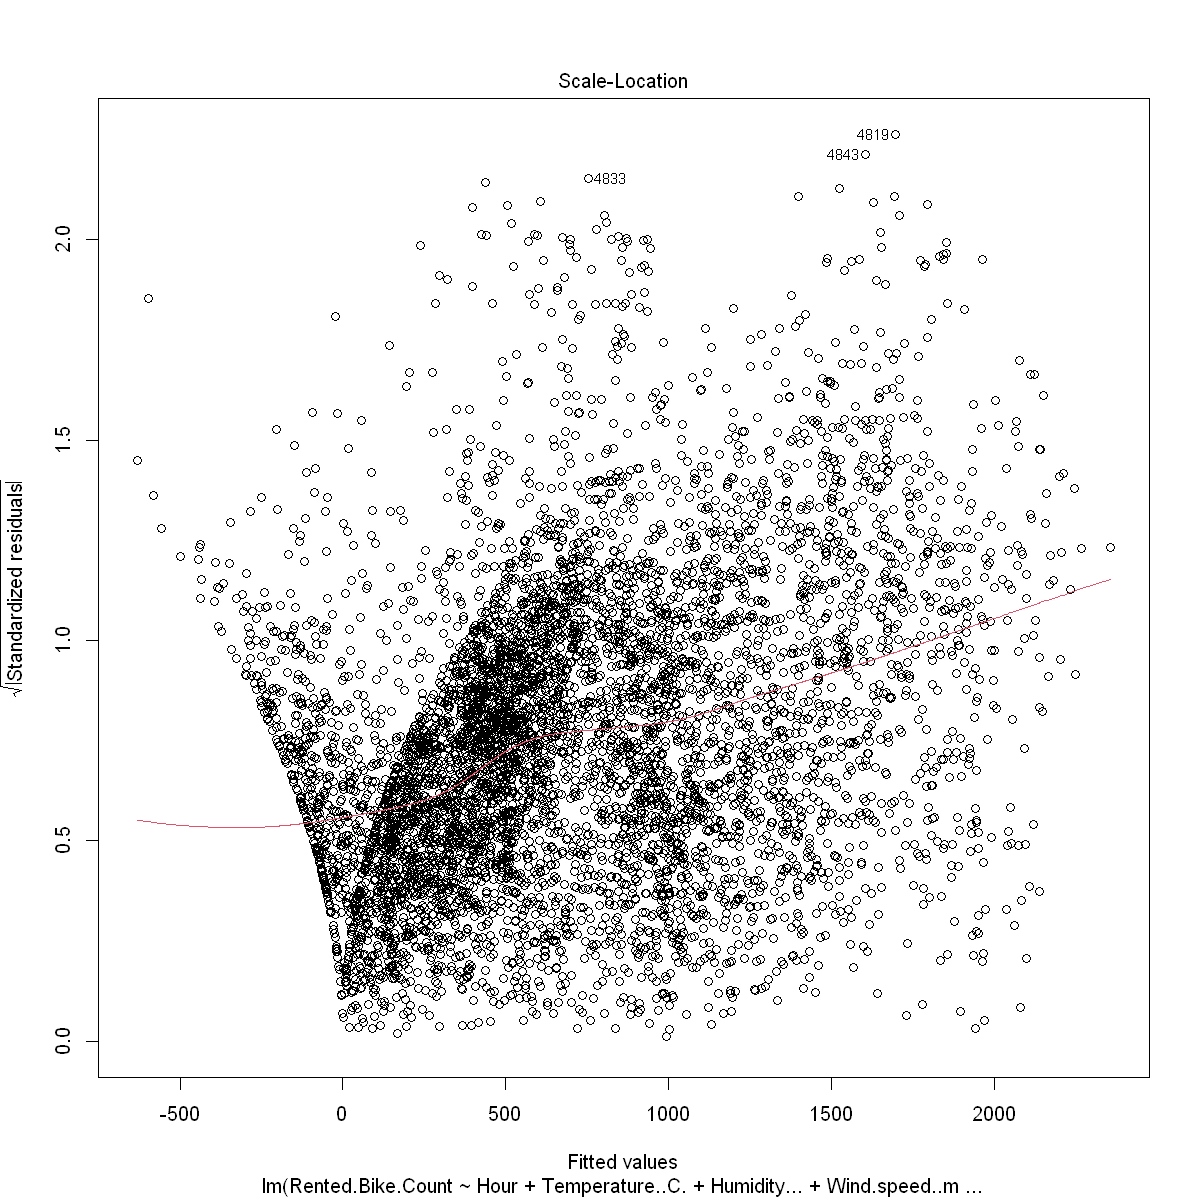

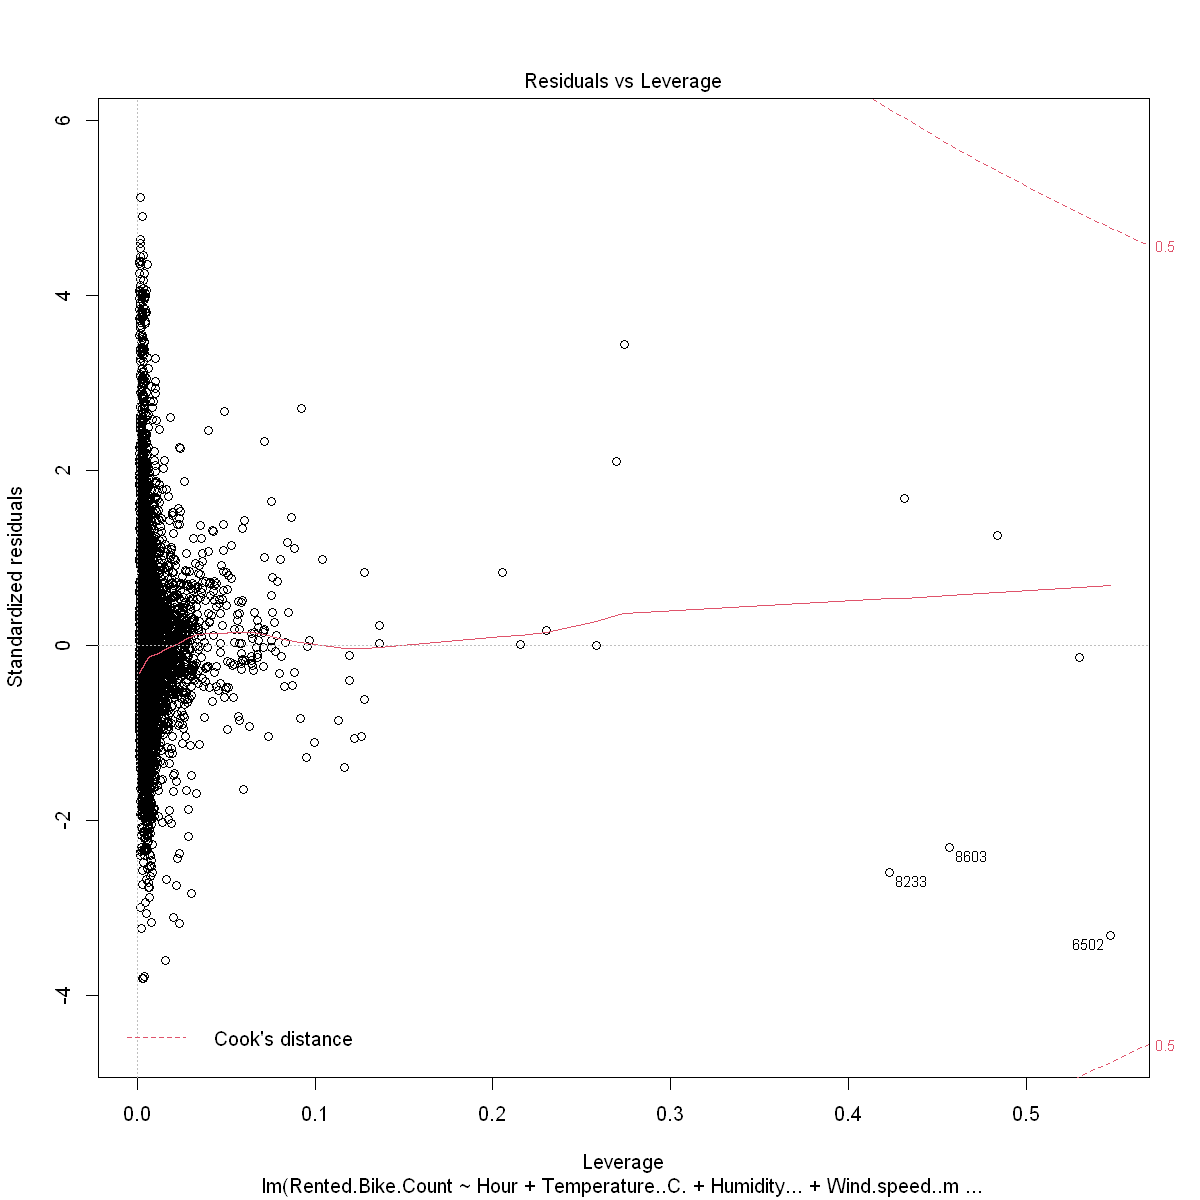

In [66]:
plot(mod_5)

In [71]:
length(mod_5$residuals)

[1] 6570

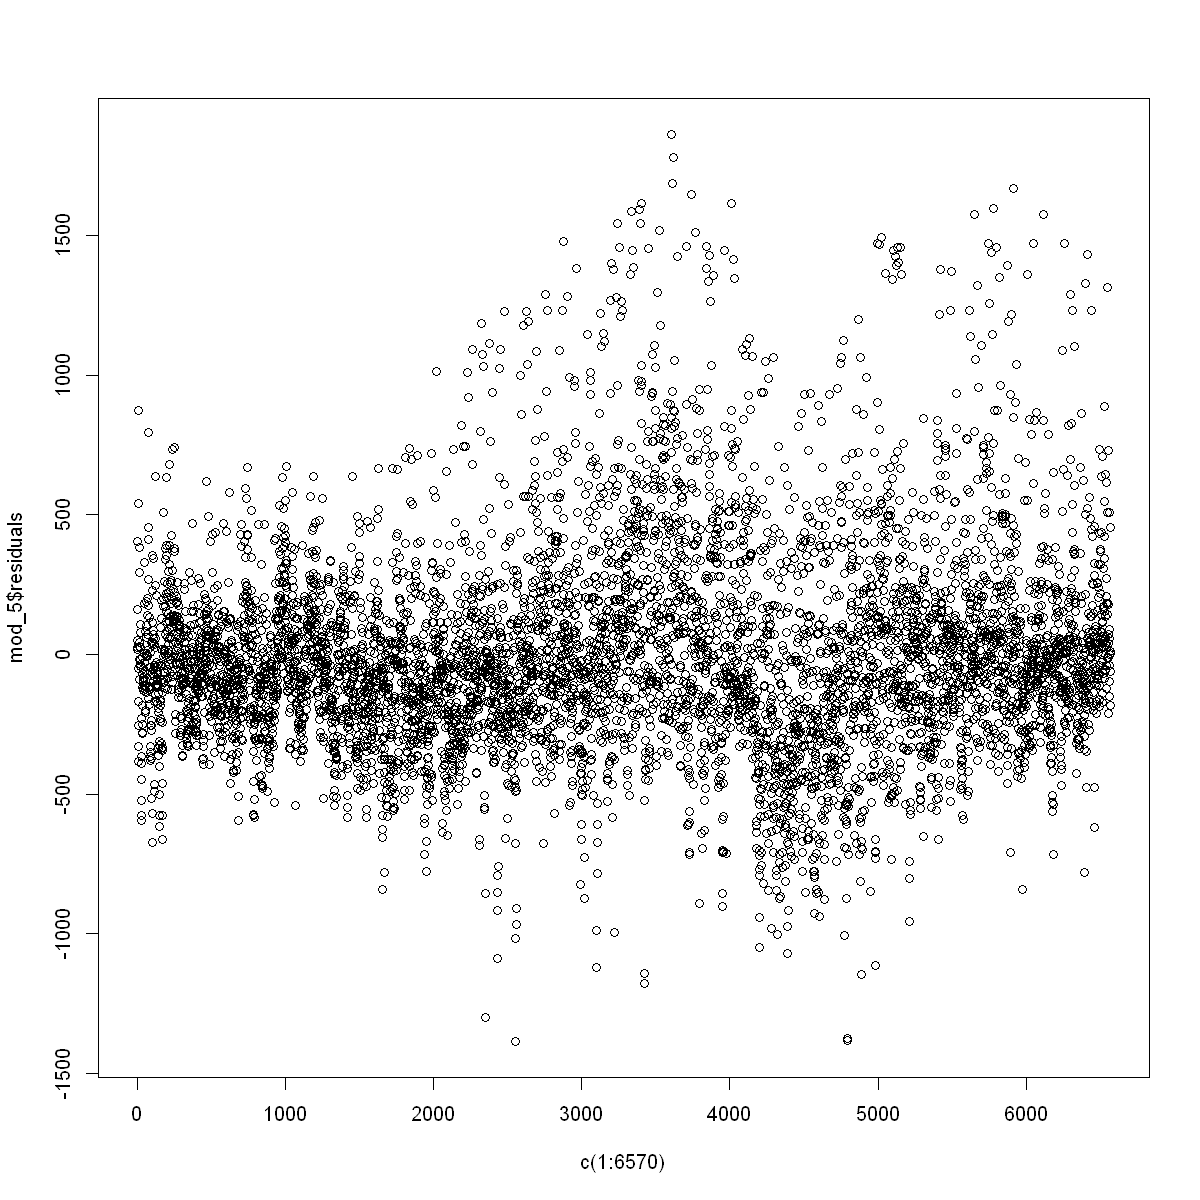

In [72]:
plot(x = c(1:6570), y = mod_5$residuals)